<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>



# **Final Project: Boston Housing**


##### Estimated time needed: **60** minutes


#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [5]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Data loaded successfully!
Dataset shape: (506, 14)


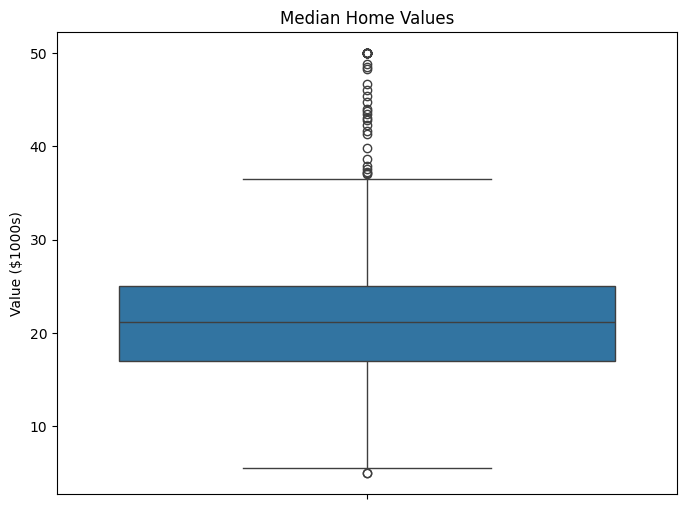

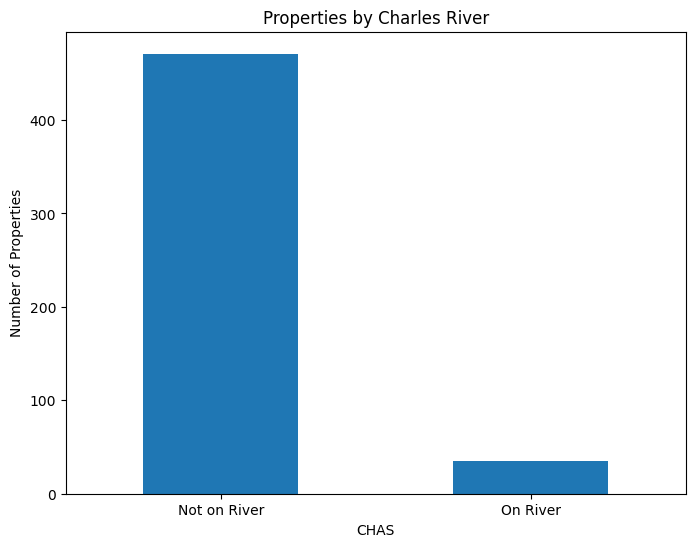

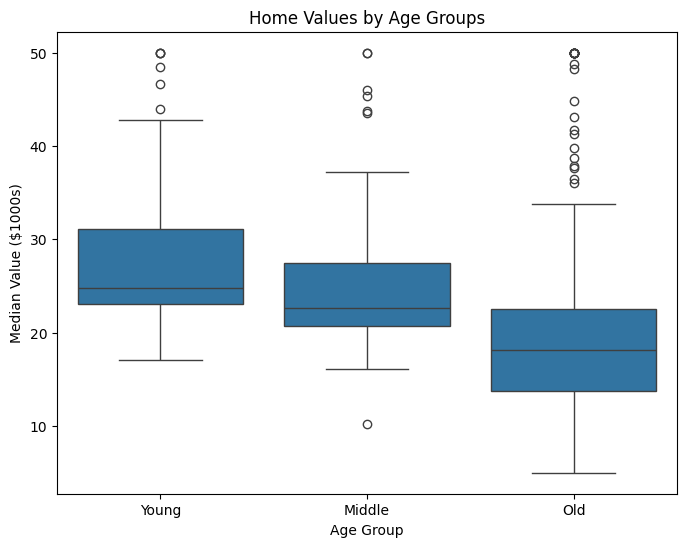

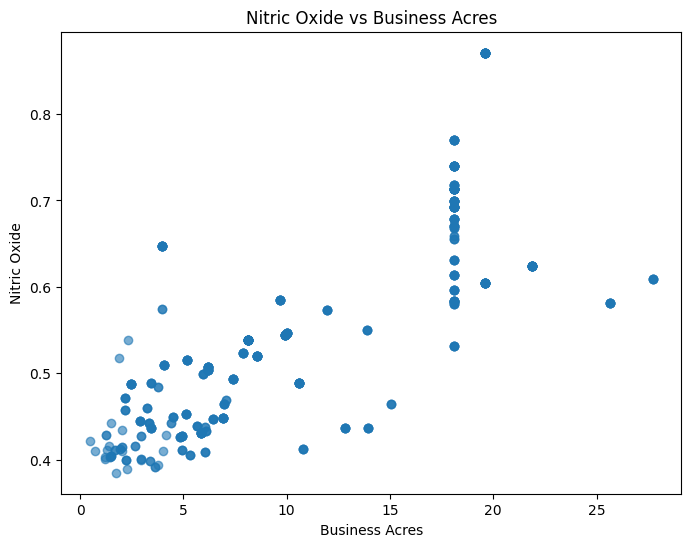

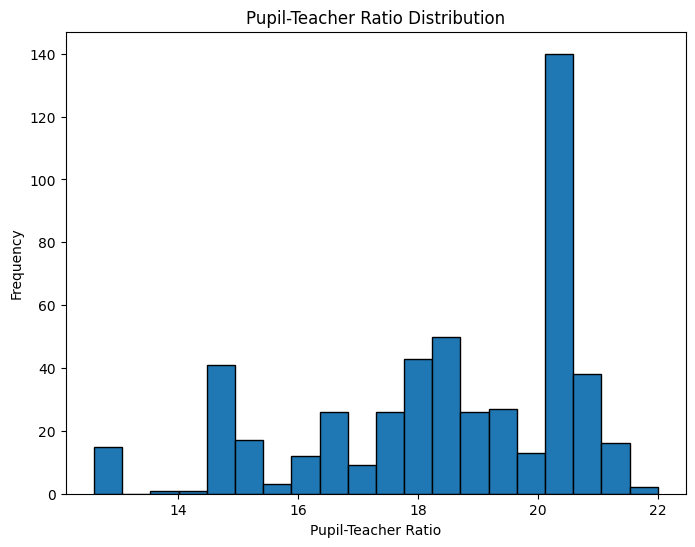


STATISTICAL TEST RESULTS

1. Charles River T-test: p-value = 0.0001
✓ SIGNIFICANT: Different home values near river

2. Age Groups ANOVA: p-value = 0.0000
✓ SIGNIFICANT: Different values across age groups

3. Correlation: r = 0.7637, p-value = 0.0000
✓ SIGNIFICANT: Strong relationship exists

4. Regression - Distance impact:
   Coefficient: 1.0916
   P-value: 0.0000
✓ SIGNIFICANT: Distance affects home values

All tests completed!


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

# Use the dataframe that's already loaded (boston_df)
print("Data loaded successfully!")
print(f"Dataset shape: {boston_df.shape}")

# 1. Boxplot for home values
plt.figure(figsize=(8, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Median Home Values')
plt.ylabel('Value ($1000s)')
plt.show()

# 2. Bar plot for Charles River
plt.figure(figsize=(8, 6))
boston_df['CHAS'].value_counts().plot(kind='bar')
plt.title('Properties by Charles River')
plt.xticks([0, 1], ['Not on River', 'On River'], rotation=0)
plt.ylabel('Number of Properties')
plt.show()

# 3. Boxplot for home values by age groups
plt.figure(figsize=(8, 6))
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], 
                               labels=['Young', 'Middle', 'Old'])
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Home Values by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000s)')
plt.show()

# 4. Scatter plot: Nitric oxide vs business acres
plt.figure(figsize=(8, 6))
plt.scatter(boston_df['INDUS'], boston_df['NOX'], alpha=0.6)
plt.title('Nitric Oxide vs Business Acres')
plt.xlabel('Business Acres')
plt.ylabel('Nitric Oxide')
plt.show()

# 5. Histogram for pupil-teacher ratio
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=20, edgecolor='black')
plt.title('Pupil-Teacher Ratio Distribution')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

# STATISTICAL TESTS
print("\n" + "="*50)
print("STATISTICAL TEST RESULTS")
print("="*50)

# Test 1: T-test for Charles River
river = boston_df[boston_df['CHAS'] == 1]['MEDV']
no_river = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = scipy.stats.ttest_ind(river, no_river)
print(f"\n1. Charles River T-test: p-value = {p_value:.4f}")
if p_value < 0.05:
    print("✓ SIGNIFICANT: Different home values near river")
else:
    print("✗ NOT SIGNIFICANT: Same home values")

# Test 2: ANOVA for Age Groups
young = boston_df[boston_df['AGE_GROUP'] == 'Young']['MEDV']
middle = boston_df[boston_df['AGE_GROUP'] == 'Middle']['MEDV']
old = boston_df[boston_df['AGE_GROUP'] == 'Old']['MEDV']
f_stat, p_value = scipy.stats.f_oneway(young, middle, old)
print(f"\n2. Age Groups ANOVA: p-value = {p_value:.4f}")
if p_value < 0.05:
    print("✓ SIGNIFICANT: Different values across age groups")
else:
    print("✗ NOT SIGNIFICANT: Same values across groups")

# Test 3: Correlation - Nitric Oxide vs Business Acres
corr, p_value = scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])
print(f"\n3. Correlation: r = {corr:.4f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("✓ SIGNIFICANT: Strong relationship exists")
else:
    print("✗ NOT SIGNIFICANT: No relationship")

# Test 4: Regression - Distance vs Home Value
X = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']
model = sm.OLS(y, X).fit()
print(f"\n4. Regression - Distance impact:")
print(f"   Coefficient: {model.params['DIS']:.4f}")
print(f"   P-value: {model.pvalues['DIS']:.4f}")
if model.pvalues['DIS'] < 0.05:
    print("✓ SIGNIFICANT: Distance affects home values")
else:
    print("✗ NOT SIGNIFICANT: No impact from distance")

print("\nAll tests completed!")